In [3]:
# Import libraries to be used
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import datetime as dt
from matplotlib.ticker import MaxNLocator
import regex
import emoji
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
from plotly import express as px

In [5]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [6]:
data = []
conversation = 'AnkitGondha.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [7]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])

weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}

df['Day'] = df['Date'].dt.weekday.map(weeks)
### Rearranging the columns for better understanding
df = df[['Date','Day','Time','Author','Message']]
### Changing the datatype of column "Day".
df['Day'] = df['Day'].astype('category')
### Looking newborn dataset.
df.head()
### Counting number of letters in each message
df['Letters'] = df['Message'].apply(lambda s : len(s))
### Counting number of word's in each message
df['Words'] = df['Message'].apply(lambda s : len(s.split(' ')))
### Function to count number of links in dataset, it will add extra column and store information in it.
URLPATTERN = r'(https?://S+)'
df['Url_Count'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.Url_Count)
### Function to count number of media in chat.
MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df.Message.apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)
### Looking updated dataset
df

,Date,Day,Time,Author,Message,Letters,Words,Url_Count,Media_Count
0,2022-08-30,Tuesday,5:04 PM,Ankit Gondha,Waiting for this message,24,4,0,0
1,2022-08-30,Tuesday,5:04 PM,Ankit Gondha,Waiting for this message,24,4,0,0
2,2022-08-30,Tuesday,5:04 PM,Ankit Gondha,Waiting for this message,24,4,0,0
3,2022-08-30,Tuesday,5:04 PM,JitanshuRaut{∆},Waiting for this message,24,4,0,0
4,2022-08-30,Tuesday,5:05 PM,Ankit Gondha,Waiting for this message,24,4,0,0
...,...,...,...,...,...,...,...,...,...
260,2022-11-29,Tuesday,1:50 PM,JitanshuRaut{∆},No,2,1,0,0
261,2022-11-29,Tuesday,1:55 PM,Ankit Gondha,Same,4,1,0,0
262,2022-11-29,Tuesday,11:51 PM,Ankit Gondha,tutorial 6 and 7 j krvana 6e n?,31,8,0,0
263,2022-11-29,Tuesday,11:51 PM,Ankit Gondha,For quiz,8,2,0,0


In [8]:
l = df.Author.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(f'--> Stats of {l[i]} <-- ')
  ### shape will print number of rows which indirectly means the number of messages
  print('Total Message Sent : ', req_df.shape[0])
  ### Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Words']))/req_df.shape[0]
  w_p_m = ("%.3f" % round(words_per_message, 2))  
  print('Average Words per Message : ', w_p_m)
  ### media conists of media messages
  media = sum(req_df["Media_Count"])
  print('Total Media Message Sent : ', media)
  ### links consist of total links
  links = sum(req_df["Url_Count"])   
  print('Total Links Sent : ', links)   
  print()
  print('----------------------------------------------------------n')

--> Stats of Ankit Gondha <-- 
Total Message Sent :  147
Average Words per Message :  7.520
Total Media Message Sent :  30
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of JitanshuRaut{∆} <-- 
Total Message Sent :  78
Average Words per Message :  7.600
Total Media Message Sent :  22
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of None <-- 
Total Message Sent :  0
Average Words per Message :  nan
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15960\1123352220.py:10: RuntimeWarning: invalid value encountered in longlong_scalars
  words_per_message = (np.sum(req_df['Words']))/req_df.shape[0]


In [9]:
### Creates a list of unique Authors
l = df.Author.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Ankit Gondha   ->   147
JitanshuRaut{∆}   ->   78
None   ->   0


In [10]:
l = df.Day.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["Day"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Tuesday   ->   71
Thrusday   ->   33
Sunday   ->   56
Friday   ->   19
Saturday   ->   44
Monday   ->   31
Wednesday   ->   11


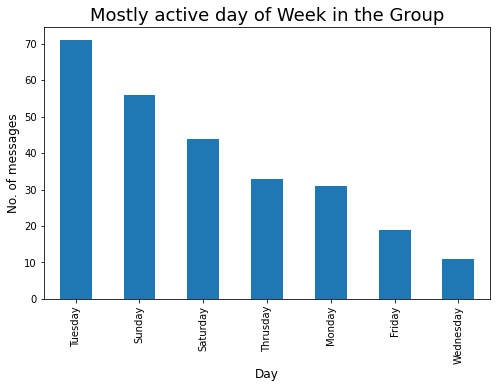

In [11]:
### Mostly Active day in the Group
plt.figure(figsize=(8,5))
active_day = df['Day'].value_counts()
### Top 10 peoples that are mostly active in our Group is : 
a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of Week in the Group',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

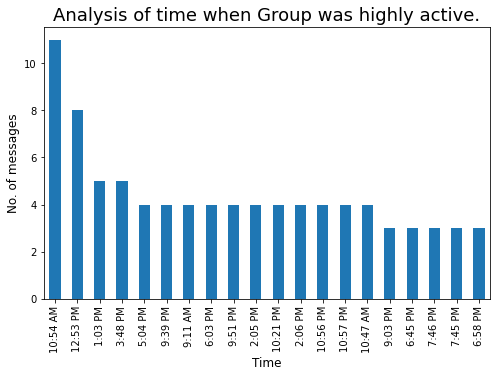

In [12]:
### Time whenever our group is highly active
plt.figure(figsize=(8,5))
t = df['Time'].value_counts().head(20)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when Group was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

In [13]:
df['Year'] = df['Date'].dt.year
df['Mon'] = df['Date'].dt.month
months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}
df['Month'] = df['Mon'].map(months)
df.drop('Mon',axis=1,inplace=True)

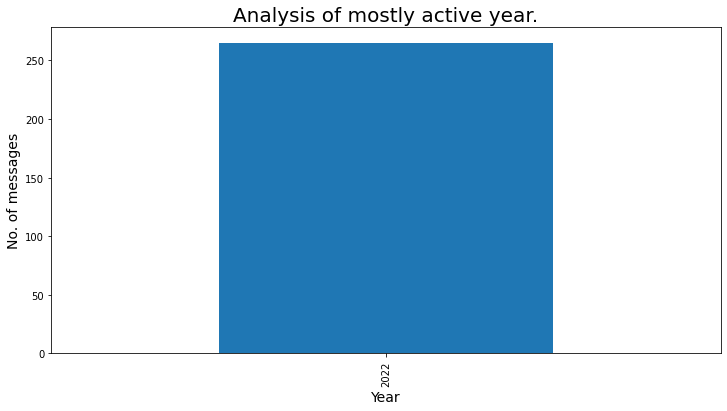

In [14]:
### Total message per year
### As we analyse that the group was created in mid 2019, thats why number of messages in 2019 is less.
plt.figure(figsize=(12,6))
active_month = df['Year'].value_counts()
a_m = active_month
a_m.plot.bar()
plt.xlabel('Year',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of mostly active year.',fontdict={'fontsize': 20,'fontweight': 8})
plt.show()

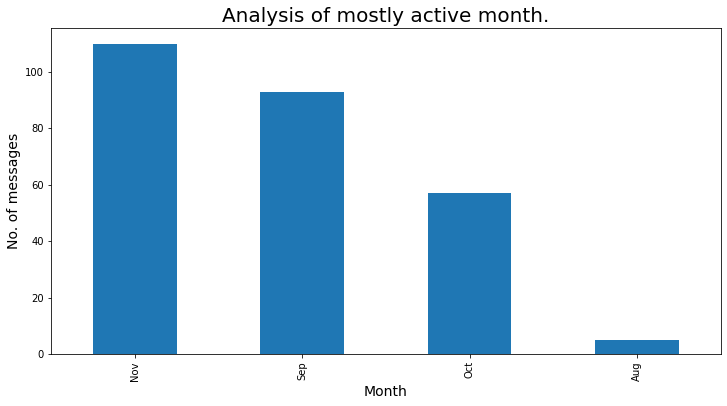

In [15]:
### Mostly Active month 
plt.figure(figsize=(12,6))
active_month = df['Month'].value_counts()
a_m = active_month
a_m.plot.bar()
plt.xlabel('Month',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of mostly active month.',fontdict={'fontsize': 20,
        'fontweight': 8})
plt.show()

In [16]:
total_messages = df.shape[0]
print(total_messages)

265


In [17]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

52


In [35]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between jitanshu and Ankit Gondha")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between jitanshu and Ankit Gondha
Total Messages:  265
Number of Media Shared:  52
Number of Emojis Shared ['👍', '😂', '🙃', '🎉', '🎉', '🤝', '😅', '👍', '👆', '🏻', '⚠', '⚠', '⚠', '⚠', '⚠', '⚠', '🚫', '🚫', '🚫', '😂', '😀', '🎉', '🎉', '🤯']
Number of Links Shared 40


In [20]:

media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1


messages_df.head()


,Date,Day,Time,Author,Message,Letters,Words,Url_Count,Media_Count,Year,Month,emoji,urlcount,Letter_Count,Word_Count,MessageCount
0,2022-08-30,Tuesday,5:04 PM,Ankit Gondha,Waiting for this message,24,4,0,0,2022,Aug,[],0,24,4,1
1,2022-08-30,Tuesday,5:04 PM,Ankit Gondha,Waiting for this message,24,4,0,0,2022,Aug,[],0,24,4,1
2,2022-08-30,Tuesday,5:04 PM,Ankit Gondha,Waiting for this message,24,4,0,0,2022,Aug,[],0,24,4,1
3,2022-08-30,Tuesday,5:04 PM,JitanshuRaut{∆},Waiting for this message,24,4,0,0,2022,Aug,[],0,24,4,1
4,2022-08-30,Tuesday,5:05 PM,Ankit Gondha,Waiting for this message,24,4,0,0,2022,Aug,[],0,24,4,1


In [25]:
emojis = []
for message in df['Message']:
        emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
emoji_df.rename(columns = {0:'Emoji'}, inplace = True)
emoji_df.rename(columns = {1:'Count'}, inplace = True)
print(emoji_df)


   Emoji  Count
0      ⚠      6
1      🎉      4
2      🚫      3
3      👍      2
4      😂      2
5      🙃      1
6      🤝      1
7      😅      1
8      👆      1
9      🏻      1
10     😀      1
11     🤯      1


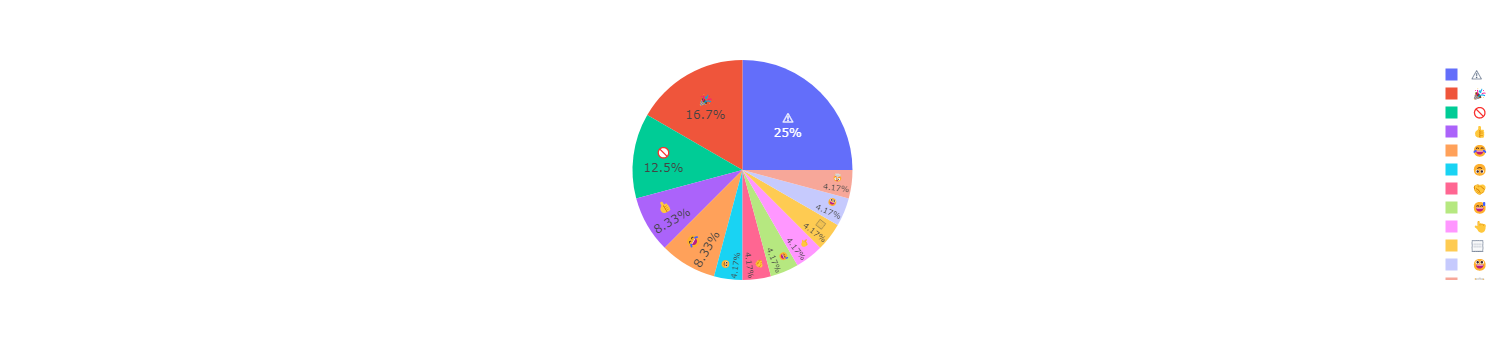

In [26]:
import plotly.express as px
fig = px.pie(emoji_df, values="Count", names="Emoji")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()





There are 18951 words in all the messages.


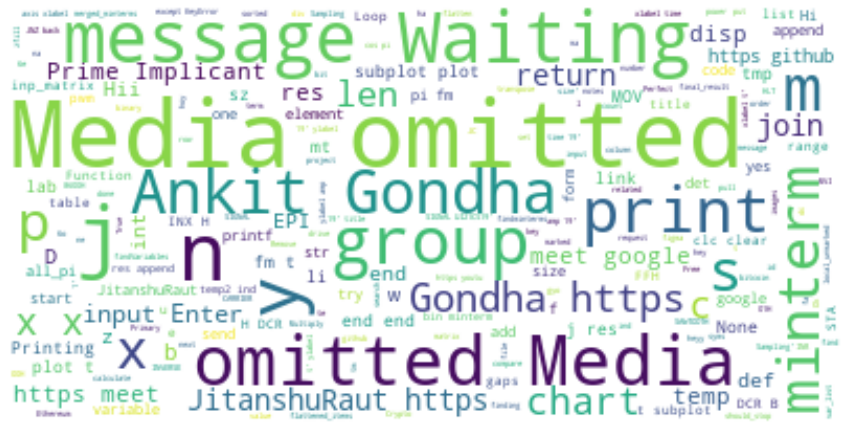

In [ ]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
# stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

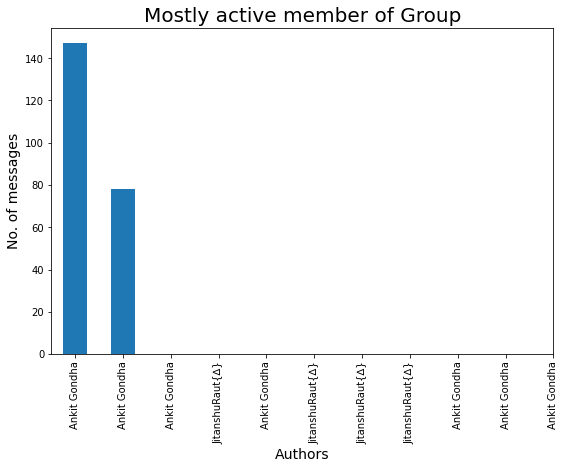

In [32]:
plt.figure(figsize=(9,6))
mostly_active = df['Author'].value_counts()
### Top 10 peoples that are mostly active in our Group is : 
df_first_10 = df.iloc[:11]
m_a = mostly_active.head(11)
bars = df_first_10["Author"]
x_pos = np.arange(len(bars))
m_a.plot.bar()
plt.xlabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of Group',fontdict={'fontsize': 20,'fontweight': 8})
plt.xticks(x_pos, bars)
plt.show()

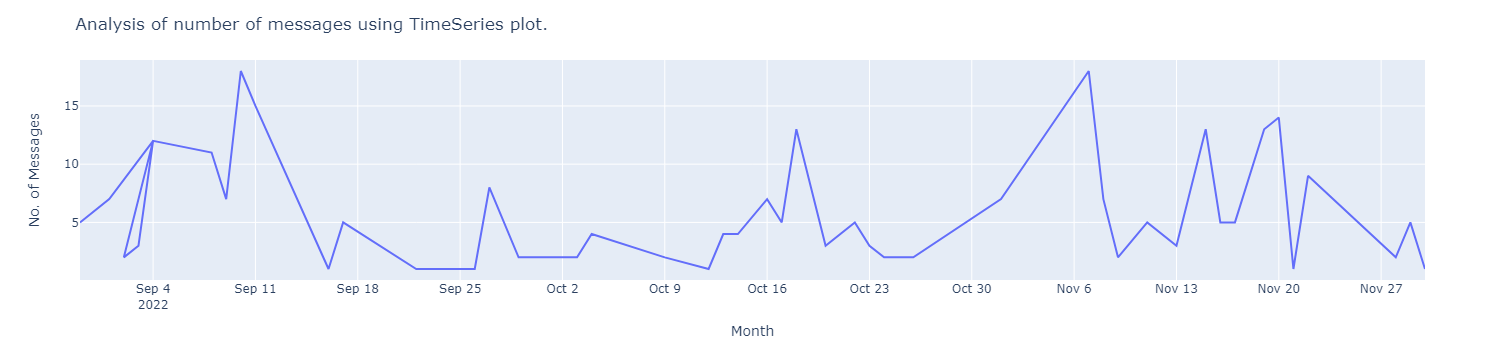

In [33]:
z = df['Date'].value_counts() 
z1 = z.to_dict() #converts to dictionary
df['Msg_count'] = df['Date'].map(z1)
### Timeseries plot 
fig = px.line(x=df['Date'],y=df['Msg_count'])
fig.update_layout(title='Analysis of number of messages using TimeSeries plot.',
                  xaxis_title='Month',
                  yaxis_title='No. of Messages')
fig.update_xaxes(nticks=20)
fig.show()

,Date,Count
0,2022-08-30,5
1,2022-09-01,7
2,2022-09-02,2
3,2022-09-03,3
4,2022-09-04,12
5,2022-09-08,9
6,2022-09-09,5
7,2022-09-10,14
8,2022-09-11,9
9,2022-09-16,1


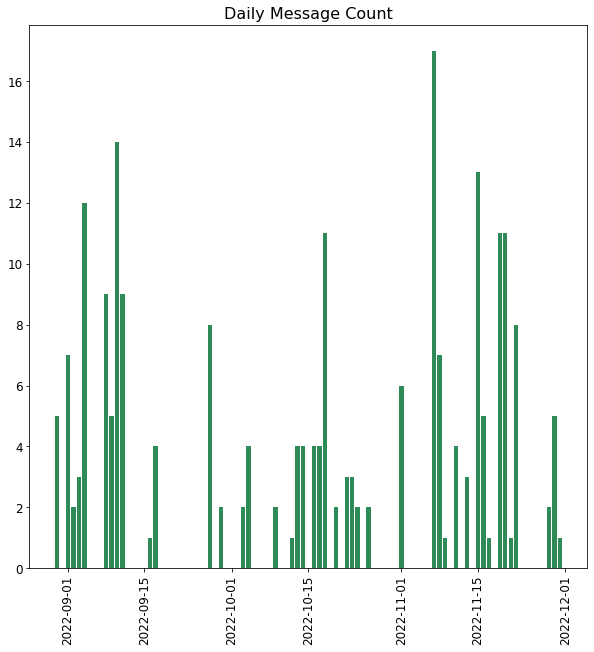

In [34]:
from matplotlib import *
def daily_msgs(df, plot=False):
    grouped = df.groupby("Date", as_index=False)["Author"]
    df_ = grouped.count()
    df_.columns = ["Date", "Count"]
    if plot:
        plt.figure(figsize=[10,10])

        plt.title("Daily Message Count", size = 16)
        plt.bar(x=df_["Date"], height=df_["Count"], color = "seagreen")
        plt.xticks(rotation = 90, size = 12)
        plt.yticks(size = 12)

    return df_
daily_msgs(df, plot=True)